In [1]:
# Import libraries and summary statistics data
import numpy as np
import pandas as pd


data = pd.read_excel('<summary statistics filename>.xlsx')

,Metabolite,OR,Lower CI,Upper CI,P-Value,Difference
0,MUFA_pct,1.124716,1.077926,1.173539,5.923252e-08,0.124716
1,unsaturation,0.879528,0.843311,0.917301,2.185521e-09,0.120472
2,glycA,1.117827,1.072567,1.164996,1.277590e-07,0.117827
3,PUFA_by_MUFA,0.890231,0.852556,0.929570,1.362596e-07,0.109769
4,XS_VLDL_TG_pct,1.101612,1.057307,1.147773,3.824940e-06,0.101612


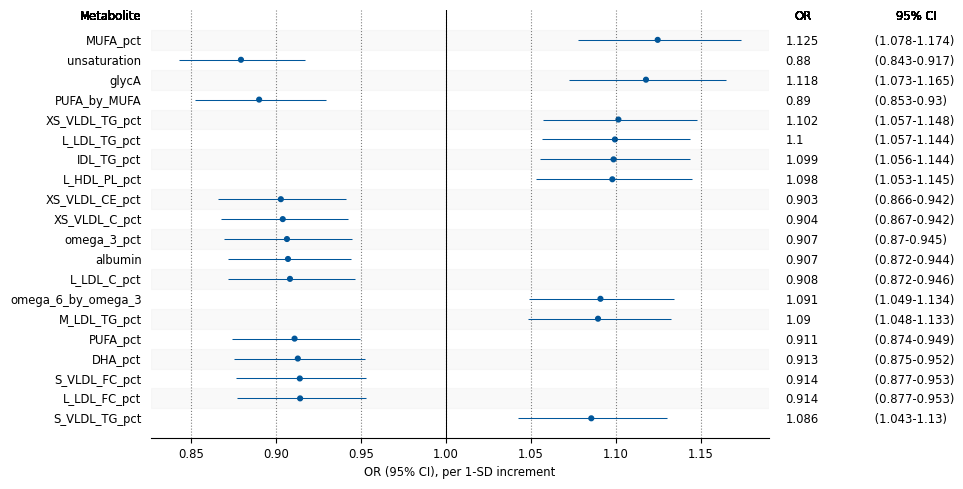

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab

# Filter data based on the p-values threshold and select top 20 significant markers
filtered_data = data[data["P-Value"] < 0.001]
filtered_data = filtered_data.iloc[:20,:]

# Set basic parameters
params = {'axes.labelsize':'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the point estimates
sns.pointplot( 
    data=filtered_data, x="OR", y="Metabolite",
    errorbar=("ci", 95),
    join=False,
    ax = ax,
    scale = 0.5,
    color = '#01579B'
)

# Plotting the error bars
lower_error = filtered_data["OR"] - filtered_data["Lower CI"]
upper_error = filtered_data["Upper CI"] - filtered_data["OR"]
asymmetric_error = [lower_error, upper_error]

ax.errorbar(filtered_data["OR"], filtered_data["Metabolite"],
            xerr = asymmetric_error, 
            fmt=' ',
            color='#01579B',
            lw=0.75
)

# Creating the zebra background for better visualization
yticks, _ = plt.yticks()
for y0, y1 in zip(yticks[::2], yticks[1::2]):
    d =0.5*(y1-y0)
    plt.axhspan(y0 - d, y1 -d, color='black', alpha=0.025)
    
# Removing splines and ticks
for pos in ['right', 'top', 'left']:
    plt.gca().spines[pos].set_visible(False)  
plt.tick_params(left = False) 

# Make the line in OR = 1
plt.axvline(x=1, color='#000000', lw=0.75)

# Make the gridlines for the y axis
ax.grid(axis='x', color='#000000', linestyle='dotted', alpha = 0.5)

# Labelling the x and y axis
ax.set_xlabel('OR (95% CI), per 1-SD increment')
ax.set_ylabel('')

# Adding the OR and 95% CI on the right panel of the plot
for y, i in zip(yticks[:], range(len(filtered_data["OR"]))):
    odds = str(round(filtered_data.iat[i, 1], 3))
    lo_ci = round(filtered_data.iat[i, 2], 3)
    up_ci = round(filtered_data.iat[i, 3], 3)
    ci = ' (' + str(lo_ci) + '-' + str(up_ci) + ')'
    ax.text(1.2, y + 0.25, odds, fontsize = 'small')
    ax.text(1.25, y + 0.25, ci, fontsize = 'small')
    ax.text(1.205, -1, 'OR', fontsize = 'small')
    ax.text(1.265, -1, '95% CI', fontsize = 'small')
    ax.text(0.785, -1, 'Metabolite', fontsize = 'small') # Adding title for the metabolites

# Saving figure
plt.tight_layout()
plt.savefig('<filename>.pdf')